In [4]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [5]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'a2rData_train_ED.csv')
df = pd.read_csv(data_file_path)

In [7]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(df, target_variable='target_ED_visit', output_dir='./a2r_ED_out')

analyzer.run()

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['regimen', 'target_ED_visit', 'intent', 'gender', 'disease_site', 'eosinophil', 'total_bilirubin', 'sodium', 'esas_anxiety', 'esas_pain', 'esas_tiredness', 'bicarbonate', 'esas_depression', 'phosphate', 'num_prior_ED_visits_within_5_years', 'age', 'patient_ecog', 'height', 'cycle_number', 'magnesium', 'esas_shortness_of_breath', 'mean_corpuscular_hemoglobin_concentration', 'esas_drowsiness', 'potassium', 'esas_well_being', 'monocyte', 'esas_appetite', 'creatinine', 'esas_nausea', 'albumin', 'mean_platelet_volume', 'chloride', 'hemoglobin']

Continuous: ['lymphocyte', 'white_blood_cell', 'alanine_aminotransferase', 'lactate_dehydrogenase', 'weight', 'days_since_prev_ED_visit', 'aspartate_aminotransferase', 'body_surface_area', 'mean_corpuscular_hemoglobin', 'mrn', 'hematocrit', 'neutrophil', 'glucose', 'red_blood_cell', 'mean_corpuscular_volume', 'alkaline_phosphatase', 're

In [9]:
import yaml
from AutoML.features.engineering import feature_engineering_clinical

with open('a2r_ED_out/config_others.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

#data_dates = df[['treatment_date','first_treatment_date']]
#data = df.drop(columns=['treatment_date','first_treatment_date'])

data = df #pd.concat([data, data_dates], axis=1)

data = feature_engineering_clinical(data, cfg)

#data.to_csv('analysis_updated/test_data.csv')
data = data.drop(columns=['treatment_date','first_treatment_date'])

print(data)

           mrn          regimen  height  weight  body_surface_area  \
0        25227  GI-GEM+ABRAXANE     154    63.3              1.612   
1        25227  GI-GEM+ABRAXANE     154    63.3              1.612   
2        25227  GI-GEM+ABRAXANE     154    63.3              1.612   
3        25227  GI-GEM+ABRAXANE     154    64.0              1.620   
4        25227  GI-GEM+ABRAXANE     154    64.0              1.620   
...        ...              ...     ...     ...                ...   
15479  6384838   GI-PANITUMUMAB     181   106.8              2.353   
15480  6389758        GI-MITOFU     162    50.8              1.511   
15481  6389758        GI-MITOFU     162    50.8              1.511   
15482  6389758        GI-MITOFU     162    50.8              1.511   
15483  6389758        GI-MITOFU     162    50.8              1.511   

       cycle_number       intent  age  esas_pain  esas_tiredness  ...  \
0                 1  NEOADJUVANT   74        0.0             0.0  ...   
1            

In [10]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='target_ED_visit', output_dir='./a2r_ED_out_updated', config_file='./a2r_ED_out/config.yaml')

analyzer.run()

Applying changes from config file...

╒══════════════════════════════════════════════════════╤════════════════════════╤═══════════╤═══════════════════════╕
│                                                      │                        │ Missing   │ Overall               │
╞══════════════════════════════════════════════════════╪════════════════════════╪═══════════╪═══════════════════════╡
│ n                                                    │                        │           │ 15484                 │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼───────────────────────┤
│ glucose, mean (SD)                                   │                        │ 0         │ 6.8 (1.9)             │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼───────────────────────┤
│ neutrophil, mean (SD)                                │                        │ 0         │ 3.1 (1.8)             │
├─────────────────

No path specified. Models will be saved in: "AutogluonModels\ag-20241002_145149"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       6.46 GB / 15.70 GB (41.1%)
Disk Space Avail:   358.03 GB / 953.12 GB (37.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prot


Model Leaderbord
----------------
╒════╤═════════════════════╤══════════════╤═════════════╤═══════════════╤══════════╤═════════════════════╕
│    │ model               │   score_test │   score_val │ eval_metric   │       f1 │   average_precision │
╞════╪═════════════════════╪══════════════╪═════════════╪═══════════════╪══════════╪═════════════════════╡
│  0 │ WeightedEnsemble_L2 │     0.850656 │    0.884926 │ roc_auc       │ 0.199357 │            0.43947  │
├────┼─────────────────────┼──────────────┼─────────────┼───────────────┼──────────┼─────────────────────┤
│  1 │ RandomForestEntr    │     0.847188 │    0.866629 │ roc_auc       │ 0.175896 │            0.440521 │
├────┼─────────────────────┼──────────────┼─────────────┼───────────────┼──────────┼─────────────────────┤
│  2 │ ExtraTreesEntr      │     0.84448  │    0.861987 │ roc_auc       │ 0.165017 │            0.44065  │
├────┼─────────────────────┼──────────────┼─────────────┼───────────────┼──────────┼─────────────────────┤
│ 

			Note: Converting 39 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 38): ['esas_pain_is_missing', 'esas_tiredness_is_missing', 'esas_nausea_is_missing', 'esas_depression_is_missing', 'esas_anxiety_is_missing', 'esas_drowsiness_is_missing', 'esas_appetite_is_missing', 'esas_well_being_is_missing', 'esas_shortness_of_breath_is_missing', 'patient_ecog_is_missing', 'alanine_aminotransferase_is_missing', 'albumin_is_missing', 'alkaline_phosphatase_is_missing', 'aspartate_aminotransferase_is_missing', 'bicarbonate_is_missing', 'chloride_is_missing', 'creatinine_is_missing', 'eosinophil_is_missing', 'glucose_is_m


Simple Logistic Model Coefficients:
                                         Feature  Coefficient
      alanine_aminotransferase_change_is_missing     0.119650
                                          intent     0.106162
                                 line_of_therapy    -0.105232
                                    patient_ecog     0.087302
              num_prior_ED_visits_within_5_years     0.087076
                                  esas_tiredness     0.085508
                                      lymphocyte    -0.078746
                                       potassium    -0.077154
                                 esas_depression    -0.070790
                                 visit_month_sin    -0.065629
                            mean_platelet_volume     0.061986
                     red_cell_distribution_width    -0.056075
                                 esas_drowsiness    -0.054789
                                          gender    -0.053524
                                 

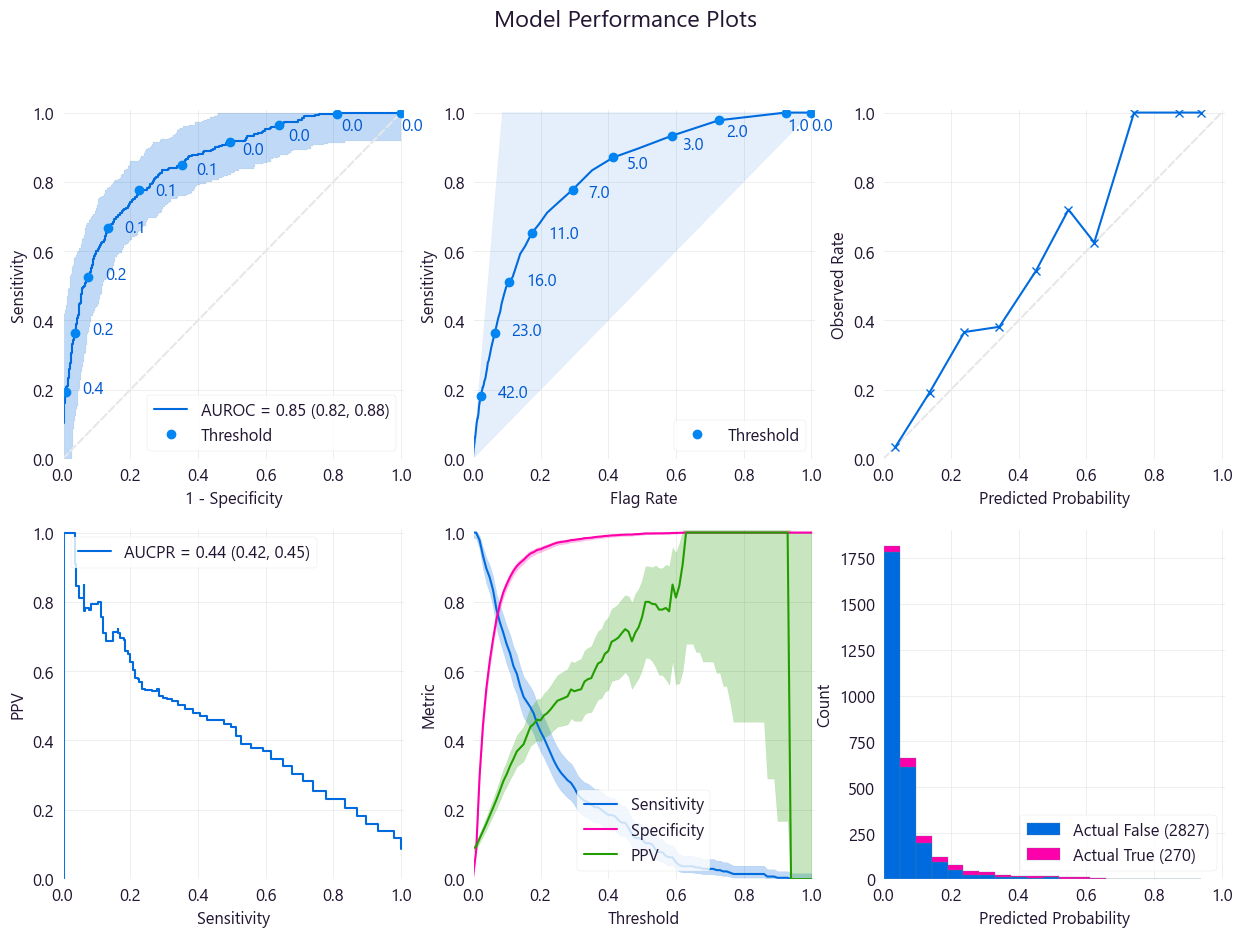

These features in provided data are not utilized by the predictor and will be ignored: ['esas_pain_is_missing', 'esas_tiredness_is_missing', 'esas_nausea_is_missing', 'esas_depression_is_missing', 'esas_anxiety_is_missing', 'esas_drowsiness_is_missing', 'esas_appetite_is_missing', 'esas_well_being_is_missing', 'esas_shortness_of_breath_is_missing', 'patient_ecog_is_missing', 'alanine_aminotransferase_is_missing', 'albumin_is_missing', 'alkaline_phosphatase_is_missing', 'aspartate_aminotransferase_is_missing', 'bicarbonate_is_missing', 'chloride_is_missing', 'creatinine_is_missing', 'eosinophil_is_missing', 'glucose_is_missing', 'hematocrit_is_missing', 'hemoglobin_is_missing', 'lactate_dehydrogenase_is_missing', 'lymphocyte_is_missing', 'magnesium_is_missing', 'mean_corpuscular_hemoglobin_is_missing', 'mean_corpuscular_hemoglobin_concentration_is_missing', 'mean_corpuscular_volume_is_missing', 'mean_platelet_volume_is_missing', 'monocyte_is_missing', 'neutrophil_is_missing', 'phosphate

Error in plotting diagnostics: 'Figure' object has no attribute 'data'


	244.87s	= Expected runtime (48.97s per shuffle set)
	93.46s	= Actual runtime (Completed 5 of 5 shuffle sets)


  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
from AutoML.trainer import AutoMLSupervised

df = pd.read_csv('./a2r_ED_out_updated/updated_data.csv', index_col=0)

trainer = AutoMLSupervised(task='binary', output_dir='./a2r_ED_trainer_explainer',)
trainer.run(df, 'target_ED_visit')